<a href="https://colab.research.google.com/github/Vasanth12414/Machine-Learning-Models-/blob/main/HealthCare.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import numpy as np
import pandas as pd
from sklearn.model_selection import (
    train_test_split,
    GridSearchCV,
    cross_val_score,
)
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report,
    roc_curve,
    auc,
)
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [14]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [15]:
df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)


<ipython-input-15-31bf7a01b39e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.bmi.replace(to_replace=np.nan, value=df.bmi.mean(), inplace=True)


In [16]:
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['ever_married'] = le.fit_transform(df['ever_married'])
df['work_type'] = le.fit_transform(df['work_type'])
df['Residence_type'] = le.fit_transform(df['Residence_type'])
df['smoking_status'] = le.fit_transform(df['smoking_status'])
x = df.iloc[:, 1:-1].values
y = df.iloc[:, -1].values

ct = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), [0, 5, 9])], remainder='passthrough'
)
x = np.array(ct.fit_transform(x))
X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=0
)


In [17]:
print('Before OverSampling, counts of label 1: {}'.format(sum(y_train == 1)))
print('Before OverSampling, counts of label 0: {}\n'.format(sum(y_train == 0)))
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())
print('After OverSampling, the shape of train_x: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {}'.format(y_train_res.shape))
print('After OverSampling, counts of label 1: {}'.format(sum(y_train_res == 1)))
print('After OverSampling, counts of label 0: {}'.format(sum(y_train_res == 0)))


Before OverSampling, counts of label 1: 195
Before OverSampling, counts of label 0: 3893

After OverSampling, the shape of train_x: (7786, 19)
After OverSampling, the shape of train_y: (7786,)
After OverSampling, counts of label 1: 3893
After OverSampling, counts of label 0: 3893


In [18]:
models = [
    ['XGBClassifier', XGBClassifier(learning_rate=0.1, objective='binary:logistic', random_state=0, eval_metric='mlogloss')],
    ['Logistic Regression', LogisticRegression(random_state=0)],
    ['KNeigbors', KNeighborsClassifier()],
    ['DecisionTree', DecisionTreeClassifier(random_state=0)],
    ['RandomForest', RandomForestClassifier(random_state=0)]
]




In [19]:
lst_1 = []
for m in range(len(models)):
    lst_2 = []
    model = models[m][1]
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    accuracies = cross_val_score(estimator=model, X=X_train_res, y=y_train_res, cv=10)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [21]:
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(models[m][0], ':')
print(cm)
print('Accuracy Score: ', accuracy_score(y_test, y_pred))
print('')
print('K-Fold Validation Mean Accuracy: {:.2f} %'.format(accuracies.mean() * 100))
print('')
print('Standard Deviation: {:.2f} %'.format(accuracies.std() * 100))
print('')


RandomForest :
[[963   5]
 [ 52   2]]
Accuracy Score:  0.9442270058708415

K-Fold Validation Mean Accuracy: 97.16 %

Standard Deviation: 6.76 %



In [23]:
print('Precision: {:.2f} %'.format(precision))
print('')
print('Recall: {:.2f} %'.format(recall))
print('')
print('F1 Score: {:.2f} %'.format(f1))
print('-' * 40)
print('')
lst_2.append(models[m][0])
lst_2.append(accuracy_score(y_test, y_pred) * 100)
lst_2.append(accuracies.mean() * 100)
lst_2.append(accuracies.std() * 100)
lst_2.append(precision)
lst_2.append(recall)
lst_2.append(f1)
lst_1.append(lst_2)


Precision: 0.29 %

Recall: 0.04 %

F1 Score: 0.07 %
----------------------------------------



          Model   Accuracy  K-Fold Mean Accuracy  Std.Deviation  Precision  \
0  RandomForest  94.422701             97.162683       6.762548   0.285714   

     Recall  F1 Score  
0  0.037037  0.065574  


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

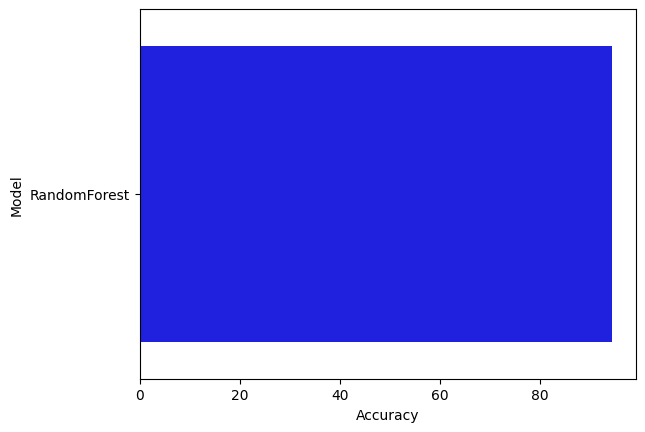

In [24]:
df2 = pd.DataFrame(
    lst_1,
    columns=['Model', 'Accuracy', 'K-Fold Mean Accuracy', 'Std.Deviation', 'Precision', 'Recall', 'F1 Score']
)

df2.sort_values(by=['Accuracy', 'K-Fold Mean Accuracy'], inplace=True, ascending=False)
print(df2)

sns.barplot(x='Accuracy', y='Model', data=df2, color='b')
plt.title